In [1]:
#Part 1 Step1 & 2

In [2]:
#Define a dictionary containing all of the data
import pandas as pd
#Request the HTML Page using requests libirary.
import requests
#Parse the HTML content using BeautifulSoup libirary.
from bs4 import BeautifulSoup
import numpy as np
# sending get request and saving the response as response object 
req = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")
# requesting text 
page = req.text
# Parsing the HTML content
space = BeautifulSoup(page, 'html.parser')
#Printing the html in pretty way
space.prettify()
table_content = space.find_all("table", "table table-striped table-responsive-md")
#Assign the table data to a Pandas dataframe 
table = pd.read_html('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')

In [3]:
df = table[0]
#Chnging the columns name
df.columns = ['rank','x_class','date', 'region','start_time','max_time', 'end_time','movie']
#Printing the first 5 rows of the table
df.head()

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


In [4]:
# Droping the columns named movie
df = df.drop("movie", axis=1)
#Combining the date and time togetther and add a space between them
combined1 = df.date.str.cat(df.start_time, sep = ' ')
combined2 = df.date.str.cat(df.max_time, sep = ' ')
combined3 = df.date.str.cat(df.end_time, sep = ' ')

#Assigning the values backe to each column respectively and overwriting data after changing format 
df['start_time'] = pd.to_datetime(combined1)
df['max_time'] = pd.to_datetime(combined2)
df['end_time'] = pd.to_datetime(combined3)
# reolace function is used to replace - with NaN
df.replace(to_replace = '-', value =np.nan)
df

,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,2003/10/29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,1997/11/06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2017/09/06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,2006/12/05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,2003/11/02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [5]:
df = df.drop("date", axis=1)
df.head(8)

,rank,x_class,region,start_time,max_time,end_time
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00


In [6]:
# Step 3 & 4

In [7]:
page = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
soup = BeautifulSoup(page.content, 'html.parser')
#Print the HTML to explore the tags.
print(soup)

<html><body>
<h2>Wind/WAVES type II bursts and CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gs

In [8]:
#Find <pre> tag and get the text of HTML.
pre = soup.find('pre').get_text()
#Split the text by '\n' to get list of text lines.
lines = pre.split('\n')
#Skip the first 12 line that we don't need.
lines = lines[12:]
#Join the lines again and replace , by space.
text = " ".join(lines)
#Split the text by the space to get list of all values/cells.
cells = text.split(' ')
#Remove the empty values in the list.
while("" in cells ) : 
    cells.remove("") 
#Print the list of cells 
print(cells)

['1997/04/01', '14:00', '04/01', '14:15', '8000', '4000', 'S25E16', '8026', 'M1.3', '04/01', '15:18', '74', '79', '312', 'PHTX', '1997/04/07', '14:30', '04/07', '17:30', '11000', '1000', 'S28E19', '8027', 'C6.8', '04/07', '14:27', 'Halo', '360', '878', 'PHTX', '1997/05/12', '05:15', '05/14', '16:00', '12000', '80', 'N21W08', '8038', 'C1.3', '05/12', '05:30', 'Halo', '360', '464', 'PHTX', '1997/05/21', '20:20', '05/21', '22:00', '5000', '500', 'N05W12', '8040', 'M1.3', '05/21', '21:00', '263', '165', '296', 'PHTX', '1997/09/23', '21:53', '09/23', '22:16', '6000', '2000', 'S29E25', '8088', 'C1.4', '09/23', '22:02', '133', '155', '712', 'PHTX', '1997/11/03', '05:15', '11/03', '12:00', '14000', '250', 'S20W13', '8100', 'C8.6', '11/03', '05:28', '240', '109', '227', 'PHTX', '1997/11/03', '10:30', '11/03', '11:30', '14000', '5000', 'S16W21', '8100', 'M4.2', '11/03', '11:11', '233', '122', '352', 'PHTX', '1997/11/04', '06:00', '11/05', '04:30', '14000', '100', 'S14W33', '8100', 'X2.1', '11/04

In [9]:
#There are a lot of unwanted values like 'PHTX' and the notes on the right of the page.
#We want the Start Date and the next 13 values.
#So, the solution is to search for the date in the same format.
#This is a function to check the string if it's a date in this format 'YYYY/MM/DD' or not.
#Input: String , Output: True if it's in this format 'YYYY/MM/DD', False if not.


import datetime
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y/%m/%d')
        return True
    except ValueError:
        return False

In [10]:
#Make list of 14 empty list, every list will get one coulmn values.
lists  = [[] for _ in range(14)]
#For loop in cells list, if the cell is a date in this format 'YYYY/MM/DD', the 14 lists will get first 14 cell. 
for i , val in enumerate(cells):
    if(validate(cells[i])):
        lists[0].append(cells[i])
        lists[1].append(cells[i+1])
        lists[2].append(cells[i+2])
        lists[3].append(cells[i+3])
        lists[4].append(cells[i+4])
        lists[5].append(cells[i+5])
        lists[6].append(cells[i+6])
        lists[7].append(cells[i+7])
        lists[8].append(cells[i+8])
        lists[9].append(cells[i+9])
        lists[10].append(cells[i+10])
        lists[11].append(cells[i+11])
        lists[12].append(cells[i+12])
        lists[13].append(cells[i+13])

In [11]:
#Now we have 14 lists, every list have one coulmn values.
#Define a dictionary containing all of the data
data = {'Start_Date':lists[0],
        'Start_Time':lists[1],
        'End_Date':lists[2],
        'End_Time':lists[3],
        'Start_Frequency':lists[4],
        'End_Frequency':lists[5],
        'Flare_Location':lists[6],
        'Flare_Region':lists[7],
        'Importance':lists[8],
        'CME_Date':lists[9],
        'CME_Time':lists[10],
        'CPA':lists[11],
        'Width':lists[12],
        'Speed':lists[13]}
 
#Convert the dictionary into DataFrame 
Nasa_df = pd.DataFrame(data)
Nasa_df

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


In [12]:
df_new = Nasa_df.copy()
# We are searching for certain character or missing values in each column and replace it with NaN
df_new.loc[df_new['Start_Frequency'] == '????','Start_Frequency'] = np.nan
df_new.loc[df_new['End_Frequency'] == '????','End_Frequency'] = np.nan
df_new.loc[df_new['Flare_Location'] == 'BACK','Flare_Location'] = np.nan
df_new.loc[df_new['Flare_Location'] == 'Back','Flare_Location'] = np.nan
df_new.loc[df_new['Flare_Region'] == '-----','Flare_Region'] = np.nan
df_new.loc[df_new['Flare_Region'] == '----------','Flare_Region'] = np.nan
df_new.loc[df_new['Importance'] == '----','Importance'] = np.nan
df_new.loc[df_new['CME_Date'] == '--/--','CME_Date'] = np.nan
df_new.loc[df_new['CME_Time'] == '--:--','CME_Time'] = np.nan
df_new.loc[df_new['CPA'] == '----','CPA'] = np.nan
df_new.loc[df_new['Width'] == '---','Width'] = np.nan
df_new.loc[df_new['Width'] == '----','Width'] = np.nan
df_new.loc[df_new['Speed'] == '----','Speed'] = np.nan


df_new.head(20)

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


In [13]:
#Creating a new column called is_halo and we are checking each row in CPA column to see if there is a string called Halo if
# there is halo in this specific row we are printing true in the is_halo column
df_new['is_halo'] = [True if x =='Halo' else False for x in df_new['CPA']] 
df_new.head(20)

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,is_halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,True
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,False
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,False
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,True
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,True
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,False


In [14]:
df_new['isLower'] = df_new['Width'].str.contains(">") 

df_new['Width'] = df_new['Width'].str.extract('(\d+)', expand=False)
df_new[20:50]

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,is_halo,isLower
20,1998/05/09,03:35,05/09,10:00,9000,400,S14W89,8210,M7.7,05/09,03:35,262,178,2331,False,False
21,1998/05/11,21:40,05/11,22:00,10000,1000,N32W90,8214,B6.6,05/11,21:55,208,301,830,False,True
22,1998/05/19,10:00,05/19,11:30,14000,3000,N23W43,8222,B5.7,05/19,10:27,268,139,801,False,False
23,1998/05/27,13:30,05/27,14:20,4000,1000,N19W62,8226,C7.5,05/27,13:45,175,268,878,False,False
24,1998/06/11,10:15,06/11,10:20,8000,4000,N16E86,8243,M1.4,06/11,10:28,123,177,1223,False,False
25,1998/06/16,18:20,06/17,21:00,12000,50,S22W90,8232,M1.0,06/16,18:27,341,281,1484,False,False
26,1998/06/20,19:39,06/20,20:00,2600,1800,NaN,NaN,NaN,06/20,18:20,Halo,360,964,True,False
27,1998/06/22,07:15,06/22,09:20,6000,2000,N16W46,8243,C2.9,06/22,05:01,265,59,206,False,False
28,1998/11/02,14:00,11/02,14:40,14000,4000,S25E44,8373,C4.4,11/02,14:18,116,169,661,False,False
29,1998/11/05,22:00,11/07,08:00,5000,50,N22W18,8375,M8.4,11/05,20:44,Halo,360,1118,True,False


In [15]:
# We are extracting the year from the column data and then add this year to End_Date and Cme_Date columns
df_new['year'] = pd.DatetimeIndex(df_new['Start_Date']).year

df_new['End_Date'] = df_new['year'].map(str) + '/' + df_new['End_Date'].map(str)
df_new['CME_Date'] = df_new['year'].map(str) + '/' + df_new['CME_Date'].map(str)
df_new.head(20)

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,is_halo,isLower,year
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79,312,False,False,1997
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,Halo,360,878,True,False,1997
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,Halo,360,464,True,False,1997
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165,296,False,False,1997
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155,712,False,False,1997
5,1997/11/03,05:15,1997/11/03,12:00,14000,250,S20W13,8100,C8.6,1997/11/03,05:28,240,109,227,False,False,1997
6,1997/11/03,10:30,1997/11/03,11:30,14000,5000,S16W21,8100,M4.2,1997/11/03,11:11,233,122,352,False,False,1997
7,1997/11/04,06:00,1997/11/05,04:30,14000,100,S14W33,8100,X2.1,1997/11/04,06:10,Halo,360,785,True,False,1997
8,1997/11/06,12:20,1997/11/07,08:30,14000,100,S18W63,8100,X9.4,1997/11/06,12:10,Halo,360,1556,True,False,1997
9,1997/11/27,13:30,1997/11/27,14:00,14000,7000,N17E63,8113,X2.6,1997/11/27,13:56,98,91,441,False,False,1997


In [16]:
#Adding twoo zeros after the time
df_new['Start_Time'] = [x + ':00' for x in df_new['Start_Time']]
df_new['End_Time'] = [y + ':00' for y in df_new['End_Time']]
#Combining both date and time together
df_new['Start_Date'] = pd.to_datetime(df_new['Start_Date'].apply(str)) + pd.to_timedelta(df_new['Start_Time'])
df_new['End_Date'] = pd.to_datetime(df_new['End_Date'].apply(str)) + pd.to_timedelta(df_new['End_Time'])

df_new["CME_Date"] = df_new["CME_Date"].astype(str) +' '+ df_new["CME_Time"]

In [17]:
#Dropping specific columns
df_new = df_new.drop(['Start_Time','End_Time','CME_Time','year'], axis=1)
#Renaming some of the columns
df_new = df_new.rename(columns={"Start_Date":"Start_DateTime"})
df_new = df_new.rename(columns={"End_Date":"End_DateTime"})
df_new = df_new.rename(columns={"CME_Date":"CME_DateTime"})

df_new.head()

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,is_halo,isLower
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997/04/01 15:18,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997/04/07 14:27,Halo,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997/05/12 05:30,Halo,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997/05/21 21:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997/09/23 22:02,133,155,712,False,False


In [18]:
df_new[50:]

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,is_halo,isLower
50,1999-10-17 23:27:00,1999-10-17 23:33:00,11500,10000,N03E38,NaN,NaN,1999/10/18 00:06,40,87,247,False,False
51,1999-11-16 03:27:00,1999-11-16 03:48:00,7000,4000,N17E38,8766,M3.8,1999/11/16 03:06,81,98,636,False,False
52,1999-11-16 05:17:00,1999-11-16 05:34:00,14000,7000,N08W39,8759,M1.8,1999/11/16 05:30,285,129,712,False,False
53,2000-01-18 17:31:00,2000-01-18 22:00:00,14000,500,S19E11,8831,M3.9,2000/01/18 17:54,Halo,360,739,True,False
54,2000-01-28 20:20:00,2000-01-28 20:24:00,2200,1100,S31W17,8841,C4.7,2000/01/28 20:12,Halo,360,1177,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017/09/04 20:12,Halo,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017/09/06 12:24,Halo,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017/09/10 16:00,Halo,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017/09/12 08:03,124,96,252,False,False


### Part 2 Question 1

In [19]:
#Making copy of the previous dataframe
new_df = df_new.copy()
#Creating two new column one for the letter and the othe for so I can filter what and extract what I need only
new_df['Section_Letter'] = new_df['Importance'].str.extract('([A-Za-z]+)')
new_df['Section_Number'] = new_df['Importance'].str.replace('([A-Za-z]+)', '')

#Remove all NaN so I can extract the letter I want
new_df['Section_Letter'] = new_df['Section_Letter'].fillna('')
#I am extractin the specific letter that I only need
new_df = new_df[new_df.Section_Letter.str.contains('X',case=False)]

#changing the type of Section number from obj to into float so I can sort the numbers
new_df["Section_Number"] = new_df.Section_Number.astype(float)
#I am sorting the Number in descending to show the highest to lowest
new_df = new_df.sort_values(by= 'Section_Number',ascending=False)

#changing the type of Section number from float to into str so I can combine the columns together (I can't combine obj or str with float together)
new_df["Section_Number"] = new_df.Section_Number.astype(str)
#the part of combination
new_df['Nasa_classification'] = new_df['Section_Letter'] + new_df['Section_Number']

#I am droping the index from 51 - 91 
new_df = new_df.drop(new_df.index[50:])

#reset function is used to set a list of integer ranging from 0 to length of data as index.
new_df = new_df.reset_index(drop=True)
new_df

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,is_halo,isLower,Section_Letter,Section_Number,Nasa_classification
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003/11/04 19:54,Halo,360,2657,True,False,X,28.0,X28.0
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001/04/02 22:06,261,244,2505,False,False,X,20.0,X20.0
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003/10/28 11:30,Halo,360,2459,True,False,X,17.0,X17.0
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001/04/15 14:06,245,167,1199,False,False,X,14.0,X14.0
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003/10/29 20:54,Halo,360,2029,True,False,X,10.0,X10.0
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997/11/06 12:10,Halo,360,1556,True,False,X,9.4,X9.4
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017/09/06 12:24,Halo,360,1571,True,False,X,9.3,X9.3
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,NaN,X,9.0,X9.0
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003/11/02 17:30,Halo,360,2598,True,False,X,8.3,X8.3
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017/09/10 16:00,Halo,360,3163,True,False,X,8.3,X8.3


In [20]:
#I am just making a copy of the current df
class_df = new_df.copy()
#Droping several columns
class_df = class_df.drop(class_df.columns.to_series()["Start_DateTime":"Section_Number"], axis=1)
#I am droping the index from 51 - 91 
class_df = class_df.drop(class_df.index[50:])

#reset function is used to set a list of integer ranging from 0 to length of data as index.
class_df = class_df.reset_index(drop=True)
#assigning  x_class in a df dataframe to the class_df dataframe
class_df['x_classification'] = df['x_class']
#printing the new dataframe and showing the top 50 solar flares from two pages beside each other
class_df

,Nasa_classification,x_classification
0,X28.0,X28+
1,X20.0,X20+
2,X17.0,X17.2+
3,X14.0,X17+
4,X10.0,X14.4
5,X9.4,X10
6,X9.3,X9.4
7,X9.0,X9.3
8,X8.3,X9
9,X8.3,X8.3


### Part 2 Question 2

In [21]:
Nasa_top = new_df.copy()

In [22]:
#Change the datatype of the row section number to float
Nasa_top["Section_Number"] = Nasa_top.Section_Number.astype(float)
#Getting a series of the row section number and convert it to list to deal with index
N = Nasa_top['Section_Number']
N = list(N)

#Making list of the top 50 flares by SpaceWeather:
#Getting the series x_classification from the dataframe class_df.
W = class_df['x_classification']
#Extract the letters from values to deal with just numbers.
W = W.str.replace('([A-Za-z-+]+)', '')
#change the values datatype to float and change the whole series to list in order to deal with index.
W = W.astype(float)
W = list(W)

#Now we have two lists, N -> Nasa top 50 flares and W -> SpaceWeather top 50 flares
#We have to write a function to get the best match flares.

In [23]:
def match(x):
    #Define initial values for the distance between the N_value and W_value. and the rank of best match.
    v_distance = 100
    index = -1
    #If the index of the value in N equals the index of the value in W, then return the rank (the rank = index +1) 
    if(x in W and N.index(x) == W.index(x)):
        return N.index(x) + 1 
    #If not, we will loop in the W list:
    for value in(W):
        #Every iteration, get the distance between N_value and W_value
        v_dist = abs(value-x)
        #Compare the distance with the initial distance, if smaller, update the distance and the index.
        if(v_dist < v_distance):
            v_distance = v_dist
            index = W.index(value)
    #Finally return the rank (index +1)        
    return index + 1 


In [24]:
#Make list of ranks of the top 50 Nasa flares.
rank = []
for i in N:
    rank.append(match(i))

In [25]:
#Finally, we will get a copy of the top 50 NASA flares dataframe, add the rank coulmn to it.
top_50_nasa = new_df.drop(new_df.index[50:])
top_50_nasa = top_50_nasa.reset_index(drop=True)
top_50_nasa['Best Match Rank'] = rank
#Print the finall data frame to see the result.
top_50_nasa

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,is_halo,isLower,Section_Letter,Section_Number,Nasa_classification,Best Match Rank
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003/11/04 19:54,Halo,360,2657,True,False,X,28.0,X28.0,1
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001/04/02 22:06,261,244,2505,False,False,X,20.0,X20.0,2
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003/10/28 11:30,Halo,360,2459,True,False,X,17.0,X17.0,4
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001/04/15 14:06,245,167,1199,False,False,X,14.0,X14.0,5
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003/10/29 20:54,Halo,360,2029,True,False,X,10.0,X10.0,6
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997/11/06 12:10,Halo,360,1556,True,False,X,9.4,X9.4,7
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017/09/06 12:24,Halo,360,1571,True,False,X,9.3,X9.3,8
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,NaN,X,9.0,X9.0,9
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003/11/02 17:30,Halo,360,2598,True,False,X,8.3,X8.3,10
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017/09/10 16:00,Halo,360,3163,True,False,X,8.3,X8.3,10


### Part 2 Question 3

In [26]:
#Counting the number of Halo's in Top50 Dataframe
no_of_halo_in_Top50 = np.sum(new_df['CPA'] == 'Halo')
print(no_of_halo_in_Top50)
#Counting the number of Halo's in Whole Nasa Dataframe
no_of_halo_in_Nasa = np.sum(Nasa_df['CPA'] == 'Halo')
print(no_of_halo_in_Nasa)

42
285


### I am trying to show with the bar chart how much of halo's are present in the whole Nasa Dataset versus the number of halo's are there in the Top50 solar flares Dataset

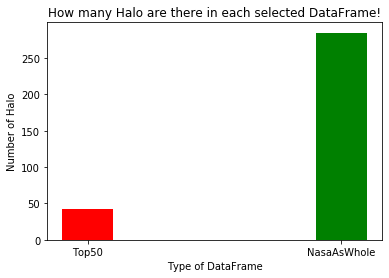

In [27]:
import matplotlib.pyplot as plt 
# heights of bars 
height = [42, 285] 
# x-coordinates of left sides of bars  
left = [1, 2] 

# labels for bars 
tick_label = ['Top50', 'NasaAsWhole'] 

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.2, color = ['red', 'green']) 
  
# naming the x-axis 
plt.xlabel('Type of DataFrame') 
# naming the y-axis 
plt.ylabel('Number of Halo') 
# plot title 
plt.title('How many Halo are there in each selected DataFrame!') 

# function to show the plot 
plt.show() 

In [28]:
#Making copy of dataframe of the top 5o so I can play with new dataframe without affecting the original one
plot_graph = top_50_nasa.copy()
#Extrating the month only from the date and add it to a new column called month
plot_graph['month'] = plot_graph['Start_DateTime'].dt.month
#Counting how much of flare are there in each month
plot_graph = plot_graph.groupby(['month'])['Flare_Region'].count()

### For out[34], the graph shows how the flares are clustured over the 12 months

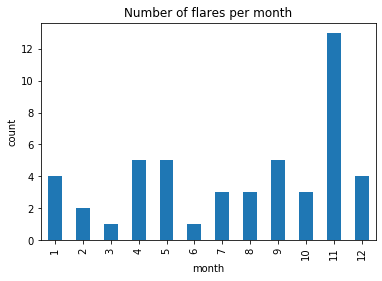

In [30]:
# plot title
plt.title('Number of flares per month')
# naming the x-axis 
plt.xlabel('months')
# naming the y-axis 
plt.ylabel('count')
# function to show the plot
plot_graph.plot.bar()